# Fusion Data

## PyWED

PyWED = Python for West Experimental Data = TSlib en Python

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pywed

In [3]:
ip,t,infos=pywed.tsbase(47979, 'sipmes')

In [4]:
infos

[[], 40, '08/07/2011', '17:54:49', 'mcs', 'MA', '', 'SIPMES', 'B']

__ATTENTION !__
La fonction tsbase s'attend à un certain nombre d'arguments en sortie
Si le nombre d'arguments en sortie n'est pas le bon --> erreur
Pour éviter cela, on peut préciser d'avance le nombre de param de sortie :


In [7]:
# comportement similaire Matlab
ip,t = pywed.tsbase(47979, 'sipmes', nargout=2) 

## IRFMtb
Toolbox IRFM

In [8]:
import IRFMtb

In [9]:
IRFMtb.tsdernier_choc() # Or : pywed.TSGetInfo()

53188

In [10]:
# Liste toutes les méthodes et attributs du module IRFMtb
dir(IRFMtb) 

['CWS',
 'IRFMtb',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'access',
 'car4',
 'clearWorkSpace',
 'cround',
 'cspline',
 'ctable1',
 'datetime',
 'divers',
 'entier4',
 'getArrayBounds',
 'getArrayRange',
 'getFloat',
 'getInputType',
 'getInt',
 'getStr',
 'ifloor',
 'ifloor1',
 'initocctrait',
 'iround',
 'isempty',
 'math',
 'nbwrite',
 'np',
 'os',
 'pywed',
 'reel4',
 'resizeResultTuple',
 'struct',
 'sys',
 'tbCommentSize',
 'tbCommon',
 'tbDateSize',
 'tbDirectorySize',
 'tbEx',
 'tbLength',
 'tbShape',
 'tbx',
 'toolboxException',
 'tsample',
 'tsbase_cert',
 'tsdernier_choc',
 'tsinitocctrait',
 'tsoccur',
 'tsrfile',
 'tsupdateocctrait',
 'tswfile',
 'updateocctrait']

## MDSplus

The python `MDSplus` package should be installed on your python distribution. It is the case on IRFM linux servers, but maybe not on your computer. Please refer to the [MDSplus webpage](http://www.mdsplus.org/index.php/Introduction) for installation instructions.

In [12]:
# Import the MDSplus package as the 'mds' shorcut
import MDSplus as mds

### WEST

Despite the fact that WEST (or Tore Supra) shot database is not using MDSplus, a wrapper exists which can be used to retrieve WEST and Tore Supra data using mdsplus. The only requirement is to have access to the partner zone, which can be asked by your local contact at IRFM. 

In [14]:
conx = mds.Connection('mdsplus.partenaires.cea.fr:8000')

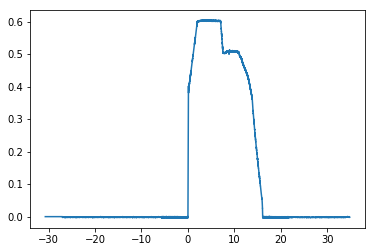

In [15]:
# wrapper which converts MDSplus TDI expression into WEST database requests.
# This is possible using the '_sig=gettsbase(shot_nb, signame)' TDI expression.
y = conx.get('_sig=gettsbase(34567,"SIPMES")')
# the time base is obtained using 'dim_of(_sig)' 
t = conx.get('dim_of(_sig)')

plot(t,y)

### JET

[JET List of Recommended Signals](http://users.euro-fusion.org/openwiki/index.php/List_of_Recommended_Signals)

In [16]:
# only works from know places, such as inside IRFM 
conx = mds.Connection('mdsplus.jet.efda.org')

In [17]:
Shot = 80812
toffset=40 # plasma breakdown offset time

# Works with PPF signals
y = conx.get('_sigi=jet(\"ppf/magn/ipla\", {})'.format(Shot))
t = conx.get('dim_of(_sigi)')

bb=conx.get('_sigb=jet(\"ppf/pt5P/pen1\", {})'.format(Shot))
tbb = conx.get('dim_of(_sigb)')

# Also works with JPF signals
barb=conx.get('_sigbarb=jet(\"jpf/DF/T5-PEN2<PRS\", {})'.format(Shot))
tbarb= conx.get('dim_of(_sigbarb)')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

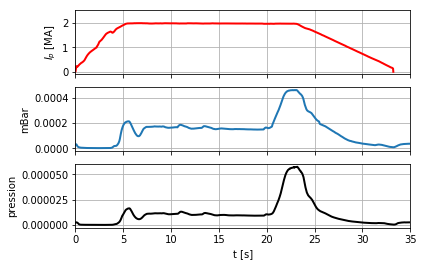

In [18]:
ax1=subplot(311)
plot(t-toffset, abs(y)/1e6, lw=2, color='r')
ylim(ymax=2.5) # it is possible to set only one parameter
ylabel('$I_p$ [MA]')
grid()
ax2=subplot(312, sharex=ax1)
plot(tbb-toffset, bb, lw=2)
ylabel("mBar")
grid()
ax3=subplot(313, sharex=ax1)
plot(tbarb-toffset, barb, lw=2, color='k')
ylabel('pression')
xlabel('t [s]')
grid()
xlim(0, 35)
# some tuning to remove the x ticks on the two first subplots
plt.setp( ax1.get_xticklabels(), visible=False)
plt.setp( ax2.get_xticklabels(), visible=False)

An other example with 2D data

In [19]:
# A 2D plot example with Li beam
ne = conx.get('_sig=jet("ppf/KY6/NER", 80812)') # Li beam ne measurement
ne_R = conx.get('dim_of(_sig,0)') # major radius in meter
ne_t = conx.get('dim_of(_sig,1)') # time in second

In [20]:
# We check the shape of the output arrays
# note that np.shape(ne) or ne.shape is similar
print(ne.shape, shape(ne_R), shape(ne_t))

(494, 48) (48,) (494,)


[3.765103, 3.896315, 9.009998321533203, 19.970001220703125]

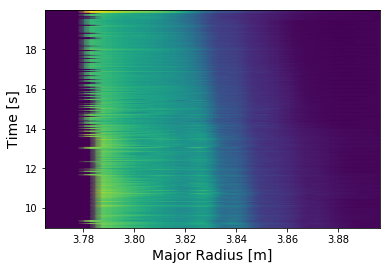

In [21]:
toffset=40 # plasma breakdown offset time
RR, tt = meshgrid(ne_R, ne_t-toffset)
pcolormesh(RR, tt, ne.value, shading='gouraud') # pcolormesh is faster and recommanded vs pcolor (from matplotlib doc)
xlabel('Major Radius [m]', fontsize=14)
ylabel('Time [s]', fontsize=14)
axis([np.min(RR), np.max(RR), np.min(tt), np.max(tt)]) # zoom in the data region

In [22]:
from IPython import utils  
from IPython.core.display import HTML  
import os  
def css_styling():  
    """Load the CSS sheet 'custom.css' located in the directory"""
    styles = "<style>\n%s\n</style>" % (open('./custom.css','r').read())
    return HTML(styles)
css_styling() 